## Figures for S.Fig 1

1. For S. Figure 1 we want the PCA plots 
2. We also want a figure showing the RCM plots for the different clustering levels


In [1]:
# Need to add in entrez gene ID and also make labels for genes for ORA
# Imports
#from scircm import *  # Note if you have a mac M1 use from sircle import * and you won't be able to do 7,8
import seaborn as sns
from sciutil import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# Setup file locations and label of the cancer
u = SciUtil()

cancer = 'ClearCellRenalCellCarcinoma'
input_dir = 'Input_RCM'
output_dir = 'Output_Data'
supp_dir = 'Required_Refs'
fig_dir = 'Output_Figures'
regLabel = 'RG2_Changes_filtered'

# Use same files as in RCM
DNA_methylation_file = os.path.join('Input_Methylation', f'{cancer}_Filtered_DCpG.csv')
RNA_file = os.path.join('Input_RNAseq', f'{cancer}_filtered_DE_RNA.csv')
protein_file = os.path.join('Input_Protein', f'{cancer}_filtered_DA_Protein.csv')

# Names of columns in each of the above files
logFC_RNA_column = "logFC_rna"
padj_RNA_column = "padj_rna"
betadiff_DNA_methylation_column = "beta_diff"
padj_DNA_methylation_column = 'adj.P.Val'
logFC_protein_column = "logFC_protein"
padj_protein_column = "padj_protein"

# NOTE: all of the above files MUST have this column i.e. they must all have the samely named gene ID column
gene_id_column = "gene_name"

# Use same cutoffs as in RCM
rna_padj_cutoff = 0.05
prot_padj_cutoff = 0.05
meth_padj_cutoff = 0.05

rna_logfc_cutoff = 1.0
prot_logfc_cutoff = 0.5
meth_diff_cutoff = 0.1

m_df = pd.read_csv(DNA_methylation_file)
r_df = pd.read_csv(RNA_file)
p_df = pd.read_csv(protein_file)

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_20315/2662358470.py:47: DtypeWarning: Columns (212) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(DNA_methylation_file)


In [2]:
# Load in the files that we used for DE analysis and remove any redundant columns
# the VAE expects just the ID as the index, and then the values #ClearCellRenalCellCarcinoma_filtered_samples_RNA
rna_sample_file = pd.read_csv(os.path.join('Input_RNAseq', f'{cancer}_filtered_samples_RNA.csv'))
prot_sample_file = pd.read_csv(os.path.join('Input_Protein', f'{cancer}_filtered_samples_Protein.csv'))
# Now we want to merge the clinical info with the cases from the sample df
meth_sample_file = pd.read_csv(os.path.join('Input_Methylation', f'{cancer}_filtered_samples_CpG.csv'))

In [3]:
for disease in set(rna_sample_file['Disease'].values):
    cases = list(rna_sample_file[rna_sample_file['Disease'] == disease]['SafeCases'].values)
    cases += list(prot_sample_file[prot_sample_file['Disease'] == disease]['SafeCases'].values)
    cases += list(meth_sample_file[meth_sample_file['Disease'] == disease]['SafeCases'].values)

    print('With at least one', disease, len(set(cases)))
          

With at least one ClearCellRenalCellCarcinoma 102


## PCA plots

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


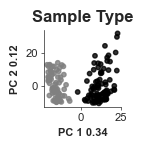

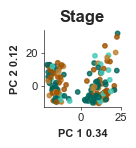

In [150]:
from sklearn.decomposition import PCA
from sciviso import *

save_fig = True
plot_fig = True

sample_df = meth_sample_file
df = m_df
disease = cancer
# -------------------------------------------
#    Visualise to check using PCA
# -------------------------------------------
cols = list(sample_df['Sample'].values)
vals = df[cols].values.T

pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values
vis_df['Colour'] = ['black' if c == 1 else 'grey' for c in vis_df['CondID'].values]
stage_c_map = {'Stage I': '#00665D', 'Stage II': '#43C9B8', 
               'Stage III': '#A05300', 
               'Stage IV': '#BF802D'}
vis_df['StageColour'] = [stage_c_map.get(c) if stage_c_map.get(c) else '#808080' for c in vis_df['Stage'].values]

figsize = (1, 1)
ss = 10
sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Sample Type',
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['Colour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_CpG_scatterPCASampleType.svg'))
if plot_fig:
    plt.show()

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Stage', 
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['StageColour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_CpG_scatterPCAStage.svg'))
if plot_fig:
    plt.show()


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


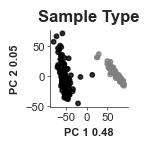

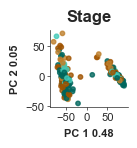

In [149]:
from sklearn.decomposition import PCA
from sciviso import *

save_fig = True
plot_fig = True

sample_df = rna_sample_file
df = r_df
disease = cancer
# -------------------------------------------
#    Visualise to check using PCA
# -------------------------------------------
cols = list(sample_df['Sample'].values)
vals = df[cols].values.T

pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values
vis_df['Colour'] = ['black' if c == 1 else 'grey' for c in vis_df['CondID'].values]
stage_c_map = {'Stage I': '#00665D', 'Stage II': '#43C9B8', 
               'Stage III': '#A05300', 
               'Stage IV': '#BF802D'}
vis_df['StageColour'] = [stage_c_map.get(c) if stage_c_map.get(c) else '#808080' for c in vis_df['Stage'].values]

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Sample Type',
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['Colour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_RNA_scatterPCASampleType.svg'))
if plot_fig:
    plt.show()

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Stage', 
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['StageColour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_RNA_scatterPCAStage.svg'))
if plot_fig:
    plt.show()


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


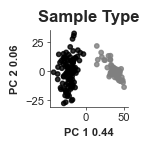

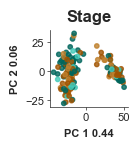

In [148]:
from sklearn.decomposition import PCA
from sciviso import *

save_fig = True
plot_fig = True

sample_df = prot_sample_file
df = p_df
disease = cancer
# -------------------------------------------
#    Visualise to check using PCA
# -------------------------------------------
cols = list(set(sample_df['Sample'].values) & set(df.columns))
sample_df = sample_df[sample_df.Sample.isin(cols)]
cols = list(sample_df['Sample'].values)
vals = df[cols].values.T
pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values
vis_df['Colour'] = ['black' if c == 1 else 'grey' for c in vis_df['CondID'].values]
stage_c_map = {'Stage I': '#00665D', 'Stage II': '#43C9B8', 
               'Stage III': '#A05300', 
               'Stage IV': '#BF802D'}
vis_df['StageColour'] = [stage_c_map.get(c) if stage_c_map.get(c) else '#808080' for c in vis_df['Stage'].values]

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Sample Type',
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['Colour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_protein_scatterPCASampleType.svg'))
if plot_fig:
    plt.show()

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Stage', 
                 xlabel=f'PC 1 {round(var_ratio[0], 2)}', ylabel=f'PC 2 {round(var_ratio[1], 2)}',
                 add_legend=True, colour=vis_df['StageColour'].values,
                 config={'s': ss, 'opacity': 0.8, 'figsize': figsize})
sc.plot()
if save_fig:
    plt.savefig(os.path.join(fig_dir, f'{disease}_protein_scatterPCAStage.svg'))
if plot_fig:
    plt.show()


In [43]:
[c for c in prot_sample_file['Sample'].values if c not in set(df.columns)]
## WHAT???? 

['C3L.00026_Tumor_Protein_CPT0001500009',
 'C3L.01607_Normal_Protein_CPT0092190003',
 'C3N.00149_Normal_Protein_CPT0084590001',
 'C3N.01524_Normal_Protein_CPT0077320001']

## Add in Plots of RCM for simplicity

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_53646/3788568187.py:1: DtypeWarning: Columns (1,2,353,381,383,384,388,389,583,584,585) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(output_dir, 'sircle_PorMandR_ClearCellRenalCellCarcinoma.csv'))
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


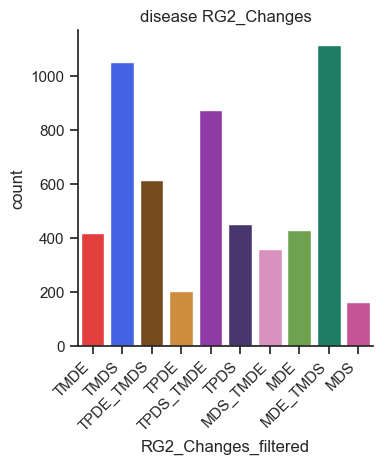

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


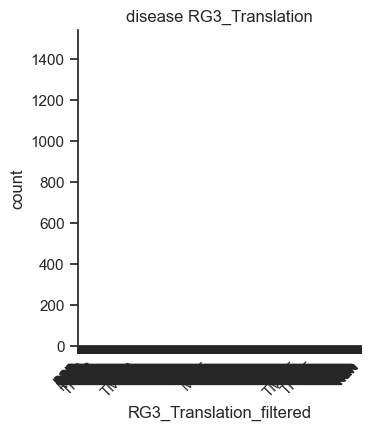

In [47]:
df = pd.read_csv(os.path.join(output_dir, 'sircle_PorMandR_ClearCellRenalCellCarcinoma.csv'))
#  ----------------------------------------------------------------------------------------------
#                   Make figures
#  ----------------------------------------------------------------------------------------------
# Make some plots
label = 'disease'
reg_label = 'RG2_Changes'
# figure size in inches
rcParams['figure.figsize'] = 3, 2
sns.set(rc={'figure.figsize': (3, 2)}, style='ticks')

colour_map = {'MDS': '#d8419b', 'MDS_TMDE': '#e585c0', 'MDS_ncRNA': '#d880b4',
              'MDE': '#6aaf44', 'MDE_TMDS': '#0e8e6d', 'MDE_ncRNA': '#9edb77',
              'TMDE': '#fe2323', 'TMDS': '#2952ff', 'TPDE': '#e68e25', 'TPDE_TMDS': '#844c0f',
              'TPDS': '#462d76', 'TPDS_TMDE': '#9b29b7'}

sns.set_palette("Greys_r")
rcm_labels = ["TMDE", "TMDS", "TPDE_TMDS", "TPDE", "TPDS_TMDE", "TPDS", "MDS_TMDE", "MDE",  "MDE_TMDS", "MDS"]
colours = [colour_map[c] for c in rcm_labels]

sns.catplot(data=df, x=reg_label + '_filtered', kind="count", order=rcm_labels, palette=sns.color_palette(colours),
            height=4)
plt.xticks(rotation=45, ha='right')
plt.title(f'{label} {reg_label}')
plt.savefig(os.path.join(fig_dir, f'Figure4A_barplot_{label}_TvN.svg'))
plt.show()




/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


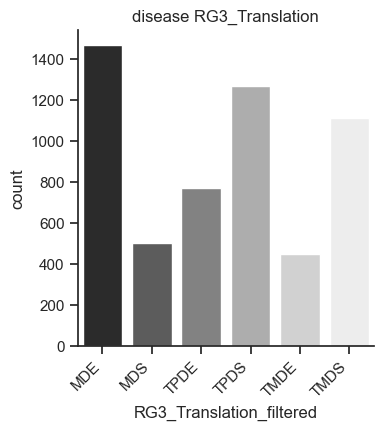

In [51]:
reg_label = 'RG3_Translation'
sns.catplot(data=df, x=reg_label + '_filtered', kind="count",
            order=['MDE', 'MDS', 'TPDE', 'TPDS', 'TMDE', 'TMDS'], height=4)
plt.xticks(rotation=45, ha='right')
plt.title(f'{label} {reg_label}')
plt.savefig(os.path.join(fig_dir, f'Figure4A_barplot_{label}_{reg_label}_TvN.svg'))
plt.show()

In [124]:
# Now we want to build a heatmap for RG1_All_filtered
# We'll have RNA + DNA methylation and then protein as the y axis
from collections import defaultdict

labels = defaultdict(lambda: defaultdict(int))
values = defaultdict(lambda: defaultdict(int))

rg2 = df['RG2_Changes_filtered'].values

for i, c in enumerate(df['RG1_All_filtered'].values):
    rna_meth = " + ".join(c.split('+')[:-1])
    prot = c.split('+')[-1]
    values[rna_meth.strip()][prot.strip()] += 1
    labels[rna_meth.strip()][prot.strip()] = rg2[i]

In [127]:
# Now we make a heatmap based on this 
cols = ['Protein UP', 'Protein significant-positive', 'Protein not-significant', 'Protein significant-negative', 'Protein DOWN',  'Protein Undetected']
rows = []
for k, v in values.items():
    if k:
        row = [k]
        for pk in cols:
            row.append(v.get(pk))
        rows.append(row)
cols = ['Label'] + cols
heatdf = pd.DataFrame(rows, columns=cols)

In [138]:
# Now we make a heatmap based on this 
cols = ['Protein Undetected', 'Protein UP', 'Protein significant-positive', 'Protein not-significant', 'Protein significant-negative', 'Protein DOWN']
row_order = ['Protein Undetected', 'Protein UP', 'Protein significant-positive', 'Protein not-significant', 'Protein significant-negative', 'Protein DOWN']
row_lbl = ['Hypomethylation  +  RNA UP', 
        'Hypomethylation  +  RNA No change',
        'Hypomethylation  +  RNA DOWN', 
        'Methylation No change  +  RNA DOWN',
        'Methylation No change  +  RNA No change',
        'Methylation No change  +  RNA UP',
        'Hypermethylation  +  RNA UP', 
        'Hypermethylation  +  RNA No change', 
        'Hypermethylation  +  RNA DOWN']
rows = []
for k in row_lbl: 
    v = values.get(k)
    for pk in cols:
        rows.append([k, pk, v.get(pk), colour_map.get(labels.get(k).get(pk)), labels.get(k).get(pk)])
cols = ['meth_rna', 'protein', 'value', 'colour', 'reglabel']
scatdf = pd.DataFrame(rows, columns=cols)

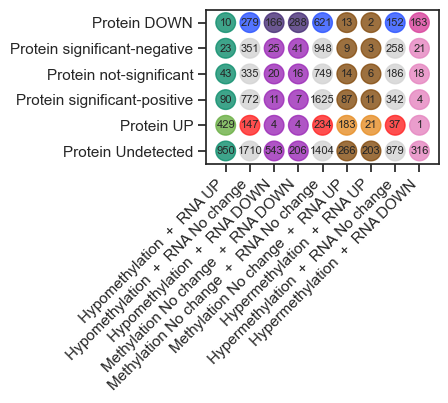

In [140]:
ax = plt.scatter(scatdf['meth_rna'], scatdf['protein'], c=[c if c else '#D3D3D3' for c in scatdf['colour']],
           s=200, alpha=0.8)
plt.xticks(rotation=45, ha='right')
for i, txt in enumerate(scatdf['meth_rna']):
    plt.annotate(str(scatdf['value'][i]), (scatdf['meth_rna'][i], scatdf['protein'][i]), 
                 ha='center', va='center', fontsize=8)
plt.margins(0.1, 0.1)
plt.savefig(os.path.join(fig_dir, f'Sfig1_scatplot_AllRG1_TvN.svg'))
